Importando todas bibliotecas necessárias para execução do Projeto.

In [127]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2


Importando a Imagem e Padronizando para a base de cinza.

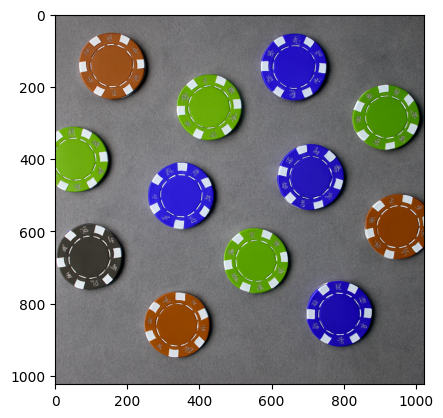

In [128]:
imagem_original = cv2.imread('circulos_1.png')
plt.imshow(imagem_original)

In [129]:
imagem_circulos = cv2.imread('circulos_1.png', cv2.IMREAD_GRAYSCALE)

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

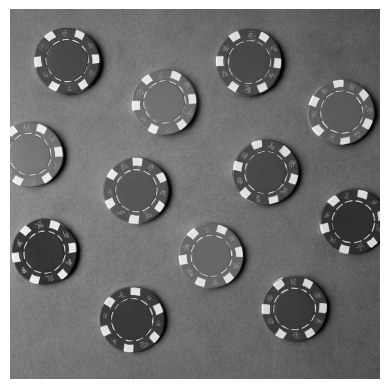

In [130]:
plt.imshow(imagem_circulos, cmap= 'gray')
plt.axis('off')

Copiar a imagem padronizada por boa prática.

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

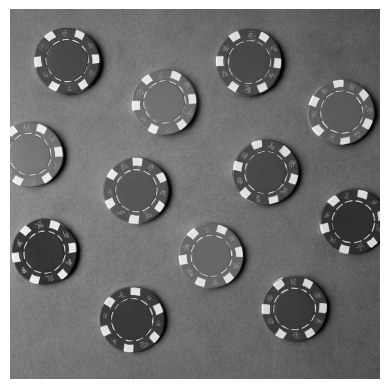

In [131]:
imagem_copia = (imagem_circulos)
plt.imshow(imagem_copia, cmap = 'gray')
plt.axis('off')

Aplicando o filtro da mediana a fim de tratar possíveis ruídos.

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

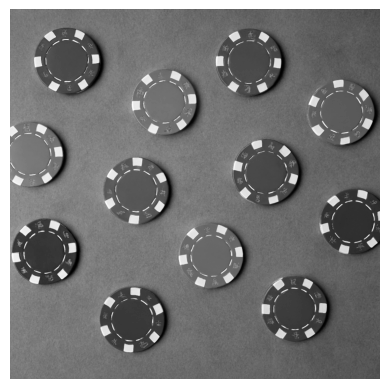

In [132]:
imagem_mediana = cv2.medianBlur(imagem_copia, 3)
plt.imshow(imagem_mediana, cmap = 'gray')
plt.axis('off')

Manipulando bordas da imagem com tratamento da Mediana

In [133]:
sobel_x = cv2.Sobel(imagem_mediana, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(imagem_mediana, cv2.CV_64F, 0, 1, ksize=5)

In [134]:
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

In [135]:
sobel_magnitude = cv2.normalize(sobel_magnitude, None, 0, 255,
cv2.NORM_MINMAX)
sobel_magnitude = sobel_magnitude.astype(np.uint8)

Binarização das Bordas em Sobel

In [136]:
_, sobel_binarizar = cv2.threshold(sobel_magnitude, 50, 255,
cv2.THRESH_BINARY)

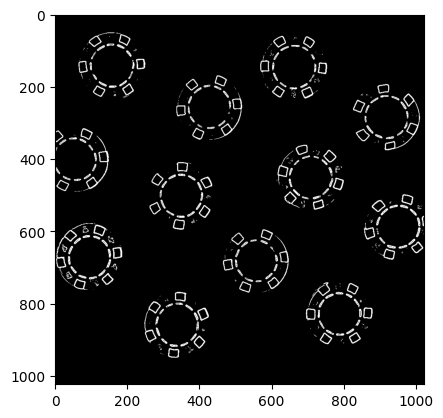

In [137]:
plt.imshow(sobel_binarizar, cmap= 'gray')



Identificar Circulos com o HOUGH CIRCLES

In [ ]:
circles = cv2.HoughCircles(sobel_binarizar, cv2.HOUGH_GRADIENT, dp=1.1, minDist=200, param1=200, param2=40, minRadius=25, maxRadius=90)
print(circles)

[[[917.95     286.55002   88.16    ]
  [ 98.450005 660.55      80.79    ]
  [440.55002  264.55002   72.43    ]
  [660.55     143.55      69.9     ]
  [783.75     825.55      65.06    ]
  [935.55005  571.45      80.9     ]
  [165.55     142.45      63.96    ]
  [352.55002  495.55002   61.43    ]]]


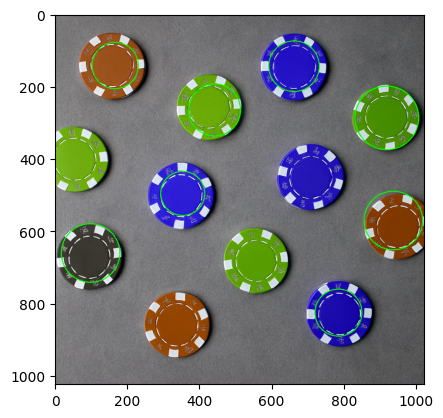

In [139]:
circles = np.uint16(np.around(circles))
circulos_imagem = imagem_original.copy()
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circulos_imagem,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    # cv2.circle(circulos_imagem,(i[0],i[1]),2,(255,0,0),10)
    
plt.imshow(circulos_imagem, cmap= 'gray')

Contagem dos Circulos contornados

In [140]:
if circles is not None:
    total_circulos = circles.shape[1]
    print(f'Total de círculos detectados: {total_circulos}')
else:
    total_circulos = 0
    print('Nenhum círculo detectado.')


Total de círculos detectados: 8
